# **PREDICTION USING SUPERVISED ML**

![](https://i.pinimg.com/736x/17/78/8e/17788e25573f1219ec573163f87a2b6f.jpg)

**AIM : To predict the percentage score of a student based on the number of study hours.**

**Importing necessary libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

 **Load the dataset into a Pandas DataFrame**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Basic information about the dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.shape

(25, 2)

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# Check for null values in the dataset

df.isnull().sum()


Hours     0
Scores    0
dtype: int64

There are no null values in the dataset.¶


In [8]:
df.duplicated().any()

False

 #  **Exploratory Data Analysis**

**Bar plot**

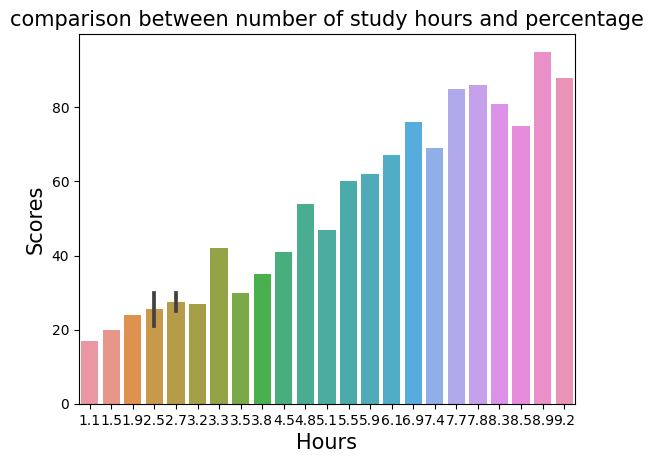

In [9]:
plt.xlabel('No of hours',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title("comparison between number of study hours and percentage",fontsize=15)
sns.barplot(x='Hours',y='Scores',data=df)
plt.show()


Maximum score is got by 8.9 hours.This is approximately 95.


**Line plot**

<Axes: title={'center': 'comparison between number of study hours and percentage'}, xlabel='No of hours', ylabel='Score'>

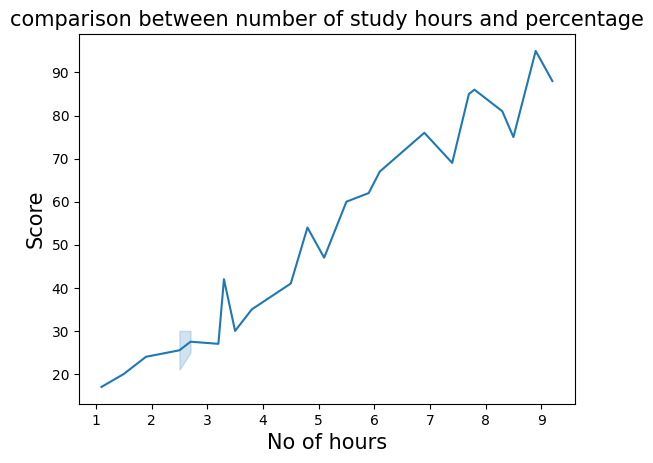

In [10]:
plt.xlabel('No of hours',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title("comparison between number of study hours and percentage",fontsize=15)
sns.lineplot(x='Hours',y='Scores',data=df)

In this plot we can see that when the number of hours increases the score will also increases,they are directly propotional.Suggesting that more study hours lead to improved perfomance.

**Scatter plot**

<function matplotlib.pyplot.show(close=None, block=None)>

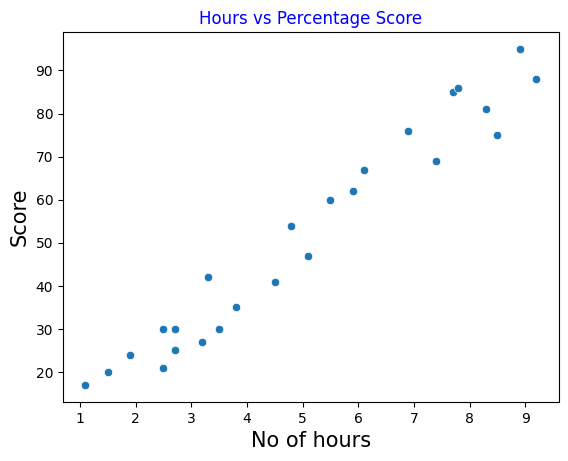

In [11]:
# Scatter plot to visualize the distribution of scores
plt.xlabel('No of hours',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title('Hours vs Percentage Score', color='blue')
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.show

From the graphs, we can see a positive relationship between the percentage scores and hours of study.

Text(0.5, 1.0, 'Hours vs Percentage Score')

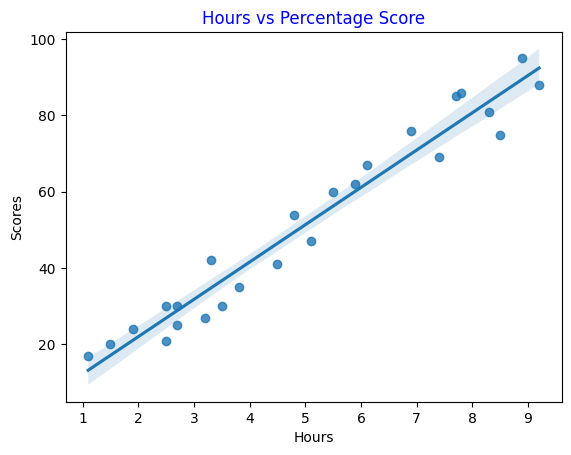

In [12]:
#Regression plot for better visualization
sns.regplot(x=df['Hours'],y=df['Scores'])
plt.title('Hours vs Percentage Score', color='blue')

In [13]:
#To check the correlation between Hours and Score
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Model Training

In [14]:
#Seperate Features And Target Variable
x=df.drop('Scores',axis=1)
y=df.Scores

In [15]:
# Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
# Model training

model = LinearRegression()
model.fit(x_train, y_train)
print("Training completed")


Training completed


In [17]:
# Plotting the regression line

line = model.coef_ * x + model.intercept_


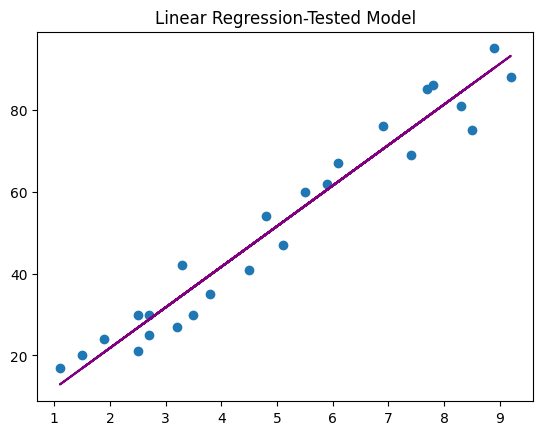

In [18]:
# Plotting for test data

plt.scatter(x, y)
plt.plot(x, line, color="purple")
plt.title('Linear Regression-Tested Model')
plt.show()

In [19]:
#Checking model accuracy on training data
model.score(x_train,y_train)

0.9515510725211552

In [20]:
#Checking model accuracy on testing data
model.score(x_test,y_test)

0.9454906892105354

In [21]:
#predict the value for test dataset
y_pred=model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [22]:
#compairing actual and predicted value
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

,Actual,Predict
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


/tmp/ipykernel_33/2760379319.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred,color='red',shade=True,label='Predicted')
/tmp/ipykernel_33/2760379319.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test,color='blue',shade=True,label='Actual')


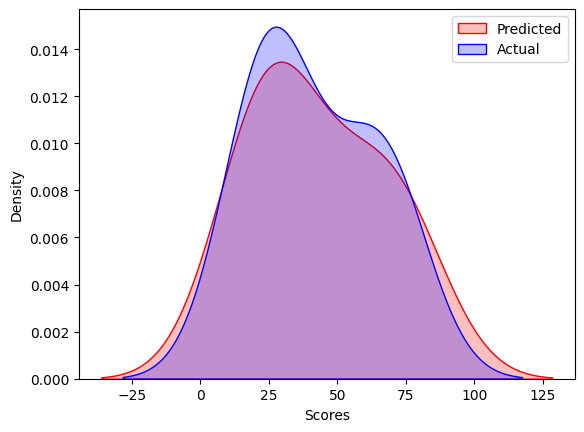

In [23]:
#Actual Vs Predicted distribution plot

sns.kdeplot(y_pred,color='red',shade=True,label='Predicted')
sns.kdeplot(y_test,color='blue',shade=True,label='Actual')
plt.legend()

**Prediction of new data**

In [24]:
# Predicting the score for a student who studies for 9.25 hours per day
given_hours = 9.25
predicted = model.predict([[given_hours]])
print("Number of hours =", given_hours)
print("Predicted score is =", predicted[0])


Number of hours = 9.25
Predicted score is = 93.69173248737539


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ased on the provided data and the trained model ,studing 9.25 hours is estimated to result in a score of approximately 93.6917.

In [25]:
# Evaluating the model

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4.183859899002982


**THANKYOU.**